# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

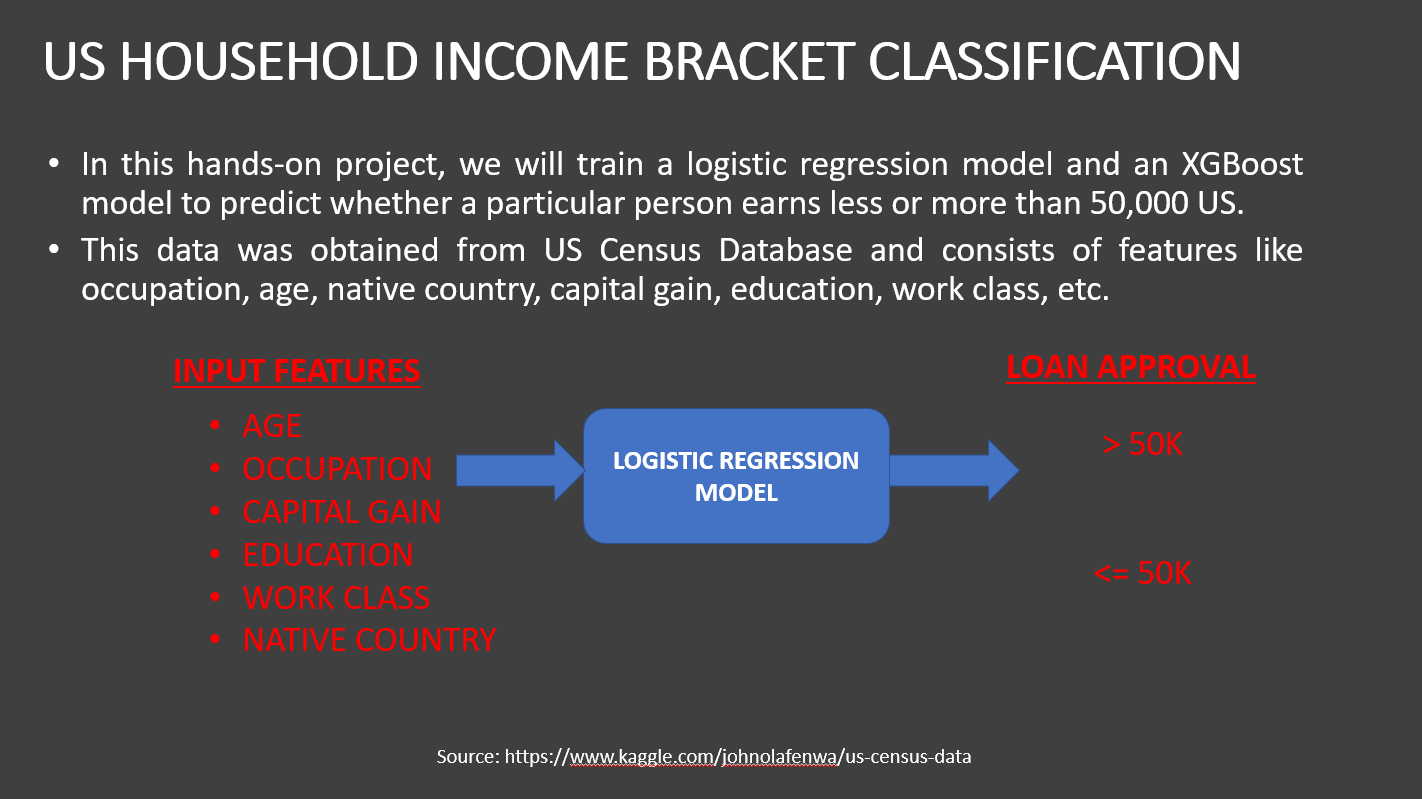

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
import xgboost

In [2]:
# Define the column names
columns = ['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num', 'Marital Status',
           'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
           'Hours/Week', 'Native country', 'Income']

# Load the dataset with the defined column names
income_df = pd.read_csv('data.csv', names=columns)

In [3]:
income_df

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Create a new column 'income_encoded' with binary values
income_df['income_encoded'] = income_df['Income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Verify the transformation by printing unique values in the new column
print(income_df['income_encoded'].unique())


[0 1]


In [5]:
income_df


,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [6]:
# Getting dataframe info
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours/Week      32561 non-null  int64 
 13  Native country  32561 non-null  object
 14  Income          32561 non-null  object
 15  income_encoded  32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [7]:
# Obtain the statistical summary of the dataframe
income_df.describe()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,income_encoded
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
# Check for null values
income_df.isnull().sum()

Age               0
Workclass         0
fnlgwt            0
Education         0
Education num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Native country    0
Income            0
income_encoded    0
dtype: int64

In [9]:
# Get the number of unique values in the workclass
income_df['Workclass'].value_counts()

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [10]:
# Replace the values '?' with mode() since it is a categorical variable
# The mode of a set of values is the value that appears most often. 

income_df.Workclass.replace(' ?', income_df.Workclass.mode()[0], inplace = True)


In [11]:
income_df['Workclass'].value_counts()

Workclass
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [12]:
# Get the number of unique values in the occupation
income_df['Occupation'].value_counts()

Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [13]:
# Replace the values '?' with mode() since it is a categorical variable
# The mode of a set of values is the value that appears most often. 
income_df.Occupation.replace(' ?', income_df.Occupation.mode()[0], inplace = True)


In [14]:
# Get the number of unique values in the native country
income_df['Native country'].value_counts()

Native country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [15]:
# Replace '?' with 'other'
income_df['Native country'].replace(' ?',' other', inplace = True)


In [16]:

income_df

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [17]:
# Select only numeric columns
numeric_df = income_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix


,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,income_encoded
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlgwt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
Education num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
Capital Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
Capital Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
Hours/Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income_encoded,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


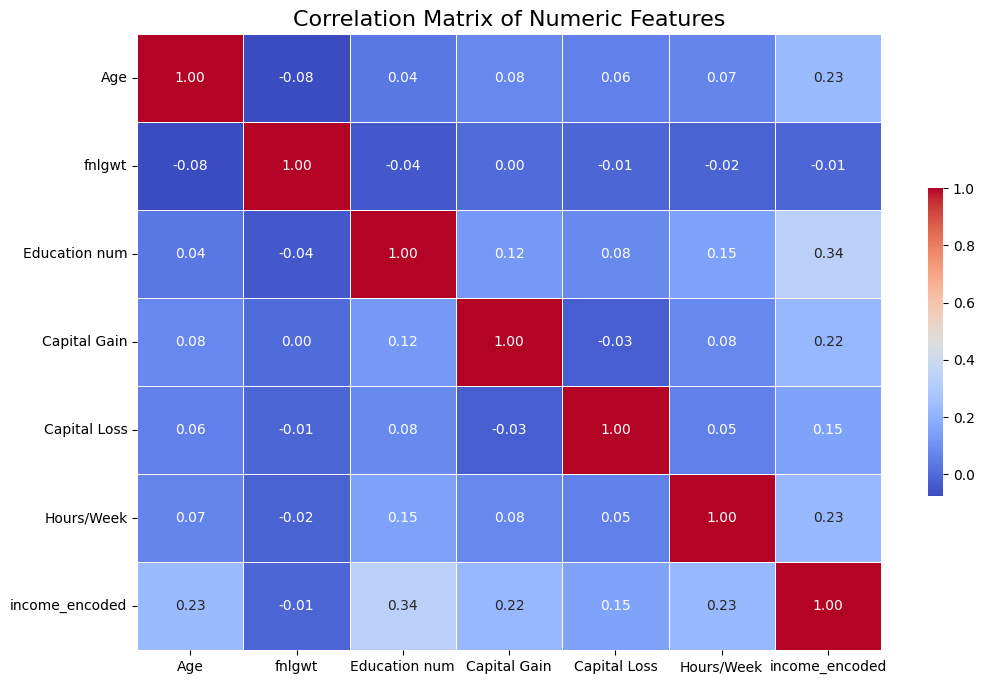

In [18]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, 
            annot=True,      # Annotate each cell with the numeric value
            cmap='coolwarm', # Use a coolwarm color map for visual distinction
            fmt=".2f",       # Format for the annotations
            linewidths=.5,   # Add lines between cells
            cbar_kws={"shrink": .5} # Adjust the color bar size
           )

# Add a title
plt.title('Correlation Matrix of Numeric Features', fontsize=16)

# Show the plot
plt.show()


# TASK #4: PERFORM DATA VISUALIZATION

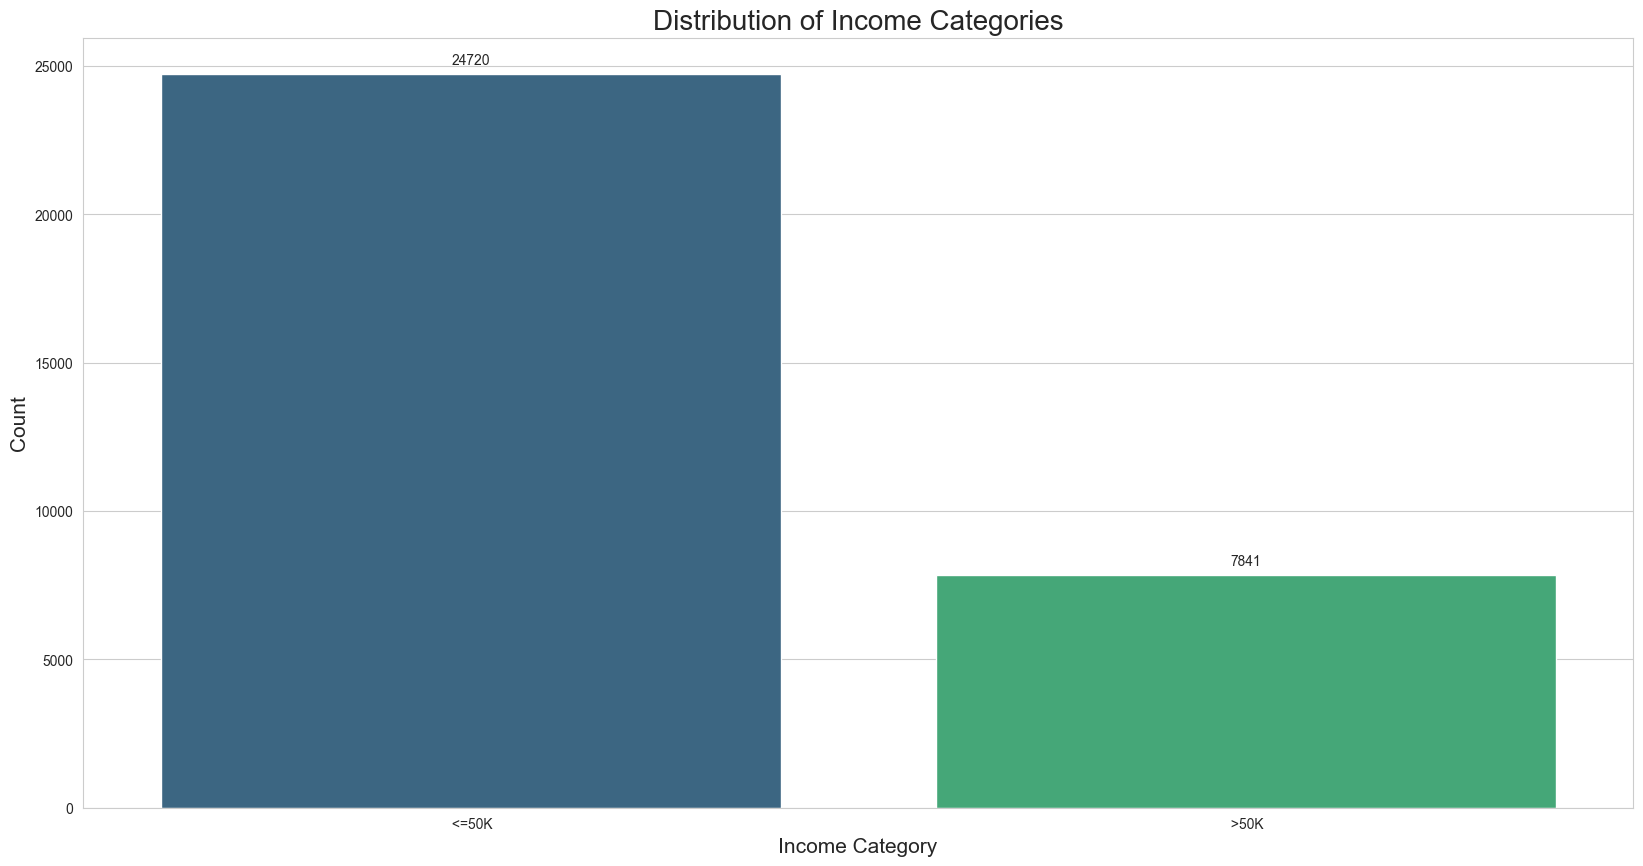

In [19]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a larger figure for better visibility
plt.figure(figsize=(20, 10))

# Create the count plot with an appealing palette
# Updated to include the 'hue' parameter
count_plot = sns.countplot(x='Income', hue='Income', data=income_df, palette='viridis', dodge=False)

# Check if the legend exists and then remove it
if count_plot.get_legend():
    count_plot.legend_.remove()

# Set a title for the plot
count_plot.set_title('Distribution of Income Categories', fontsize=20)

# Label the axes
count_plot.set_xlabel('Income Category', fontsize=15)
count_plot.set_ylabel('Count', fontsize=15)

# Optionally, add annotations to each bar
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')

# Show the plot
plt.show()


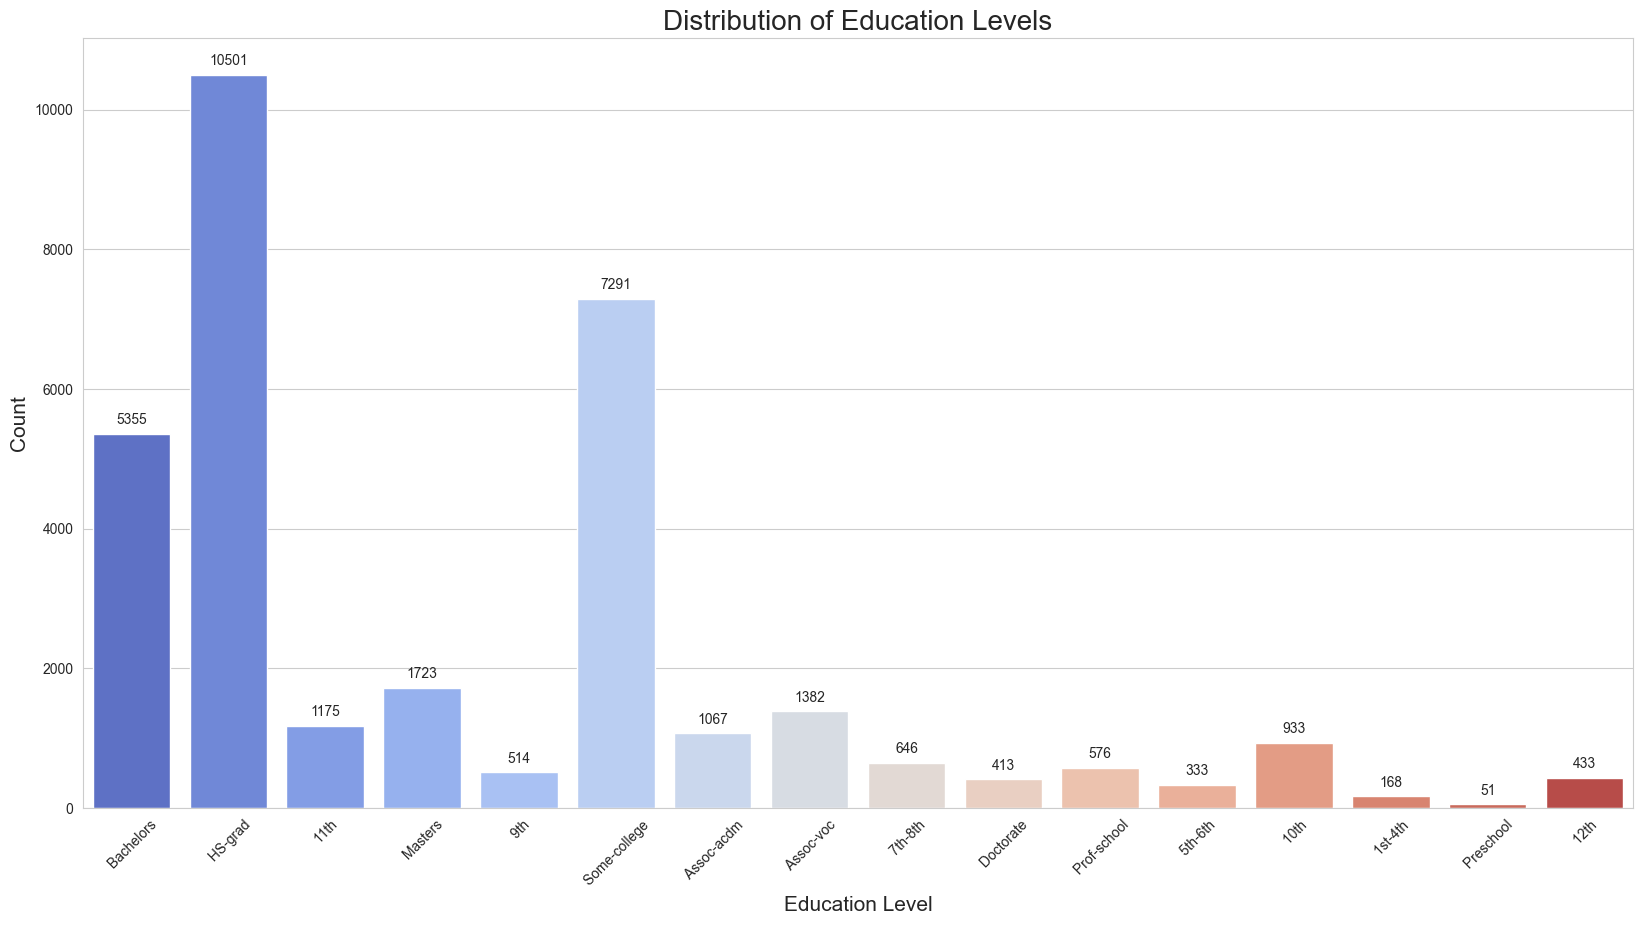

In [20]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a larger figure for better visibility
plt.figure(figsize=(20, 10))

# Create the count plot with an appealing palette
# Using 'hue' parameter and set it to the same as 'x'
count_plot = sns.countplot(x='Education', hue='Education', data=income_df, palette='coolwarm', dodge=False)

# Check if the legend exists and then remove it
if count_plot.get_legend() is not None:
    count_plot.legend_.remove()

# Set a title for the plot
count_plot.set_title('Distribution of Education Levels', fontsize=20)

# Label the axes
count_plot.set_xlabel('Education Level', fontsize=15)
count_plot.set_ylabel('Count', fontsize=15)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Optionally, add annotations to each bar
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')

# Show the plot
plt.show()


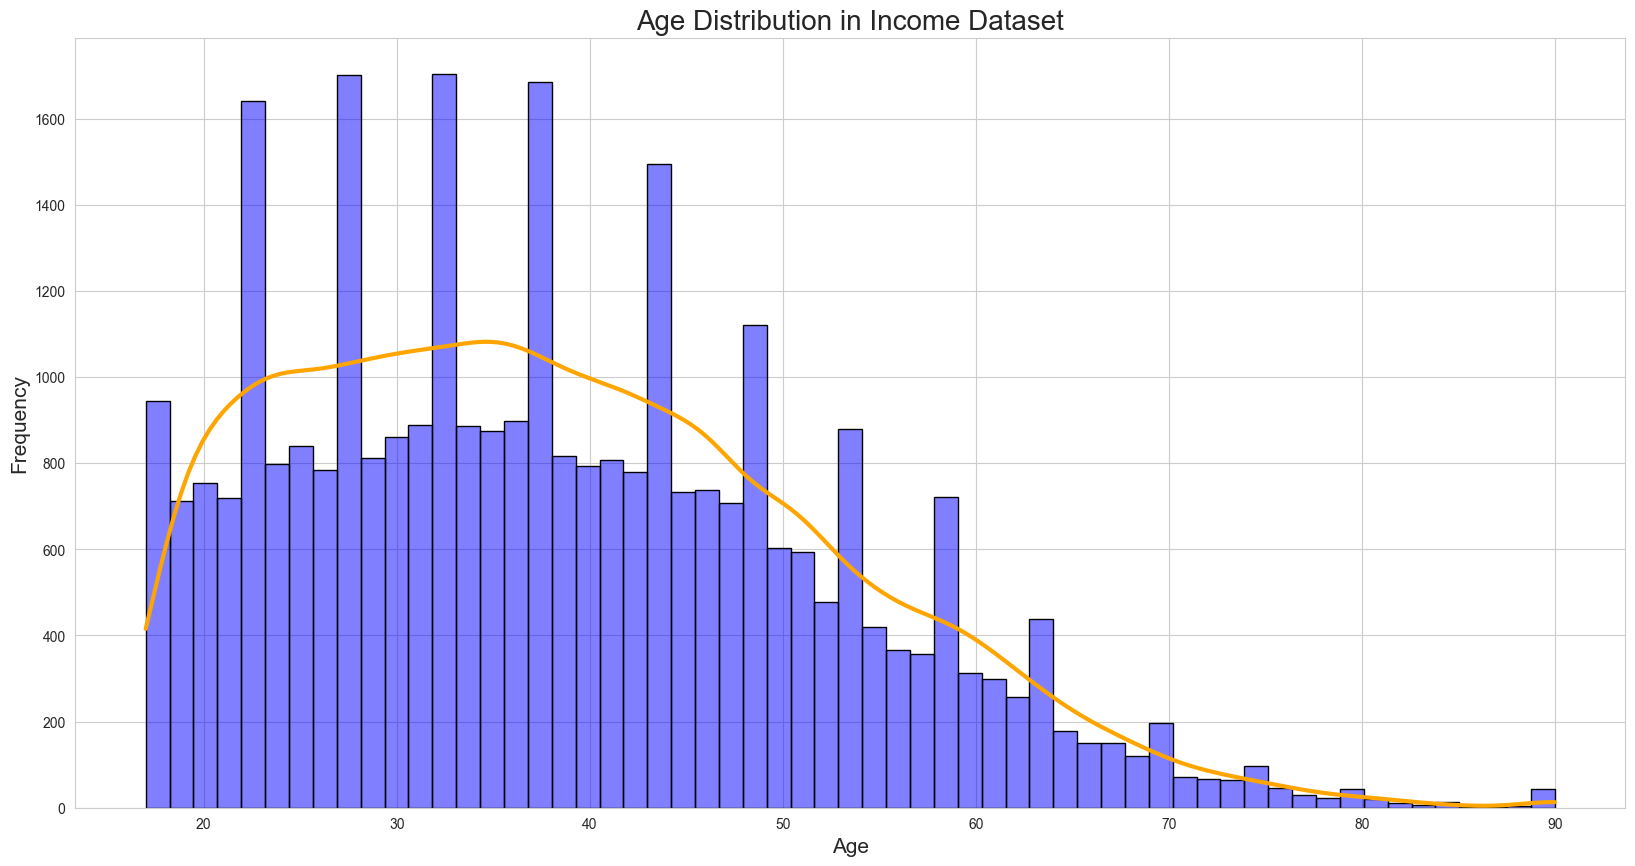

In [21]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a larger figure for better visibility
plt.figure(figsize=(20, 10))

# Use histplot to create the histogram with a KDE
age_plot = sns.histplot(income_df['Age'], kde=True, color='blue', edgecolor='black')

# Adjust the properties of the KDE line
kde_line = age_plot.lines[0]  # Get the KDE line
kde_line.set_color('orange')  # Set the color of the KDE line
kde_line.set_linewidth(3)     # Set the width of the KDE line

# Set a title for the plot
age_plot.set_title('Age Distribution in Income Dataset', fontsize=20)

# Label the axes
age_plot.set_xlabel('Age', fontsize=15)
age_plot.set_ylabel('Frequency', fontsize=15)

# Show the plot
plt.show()


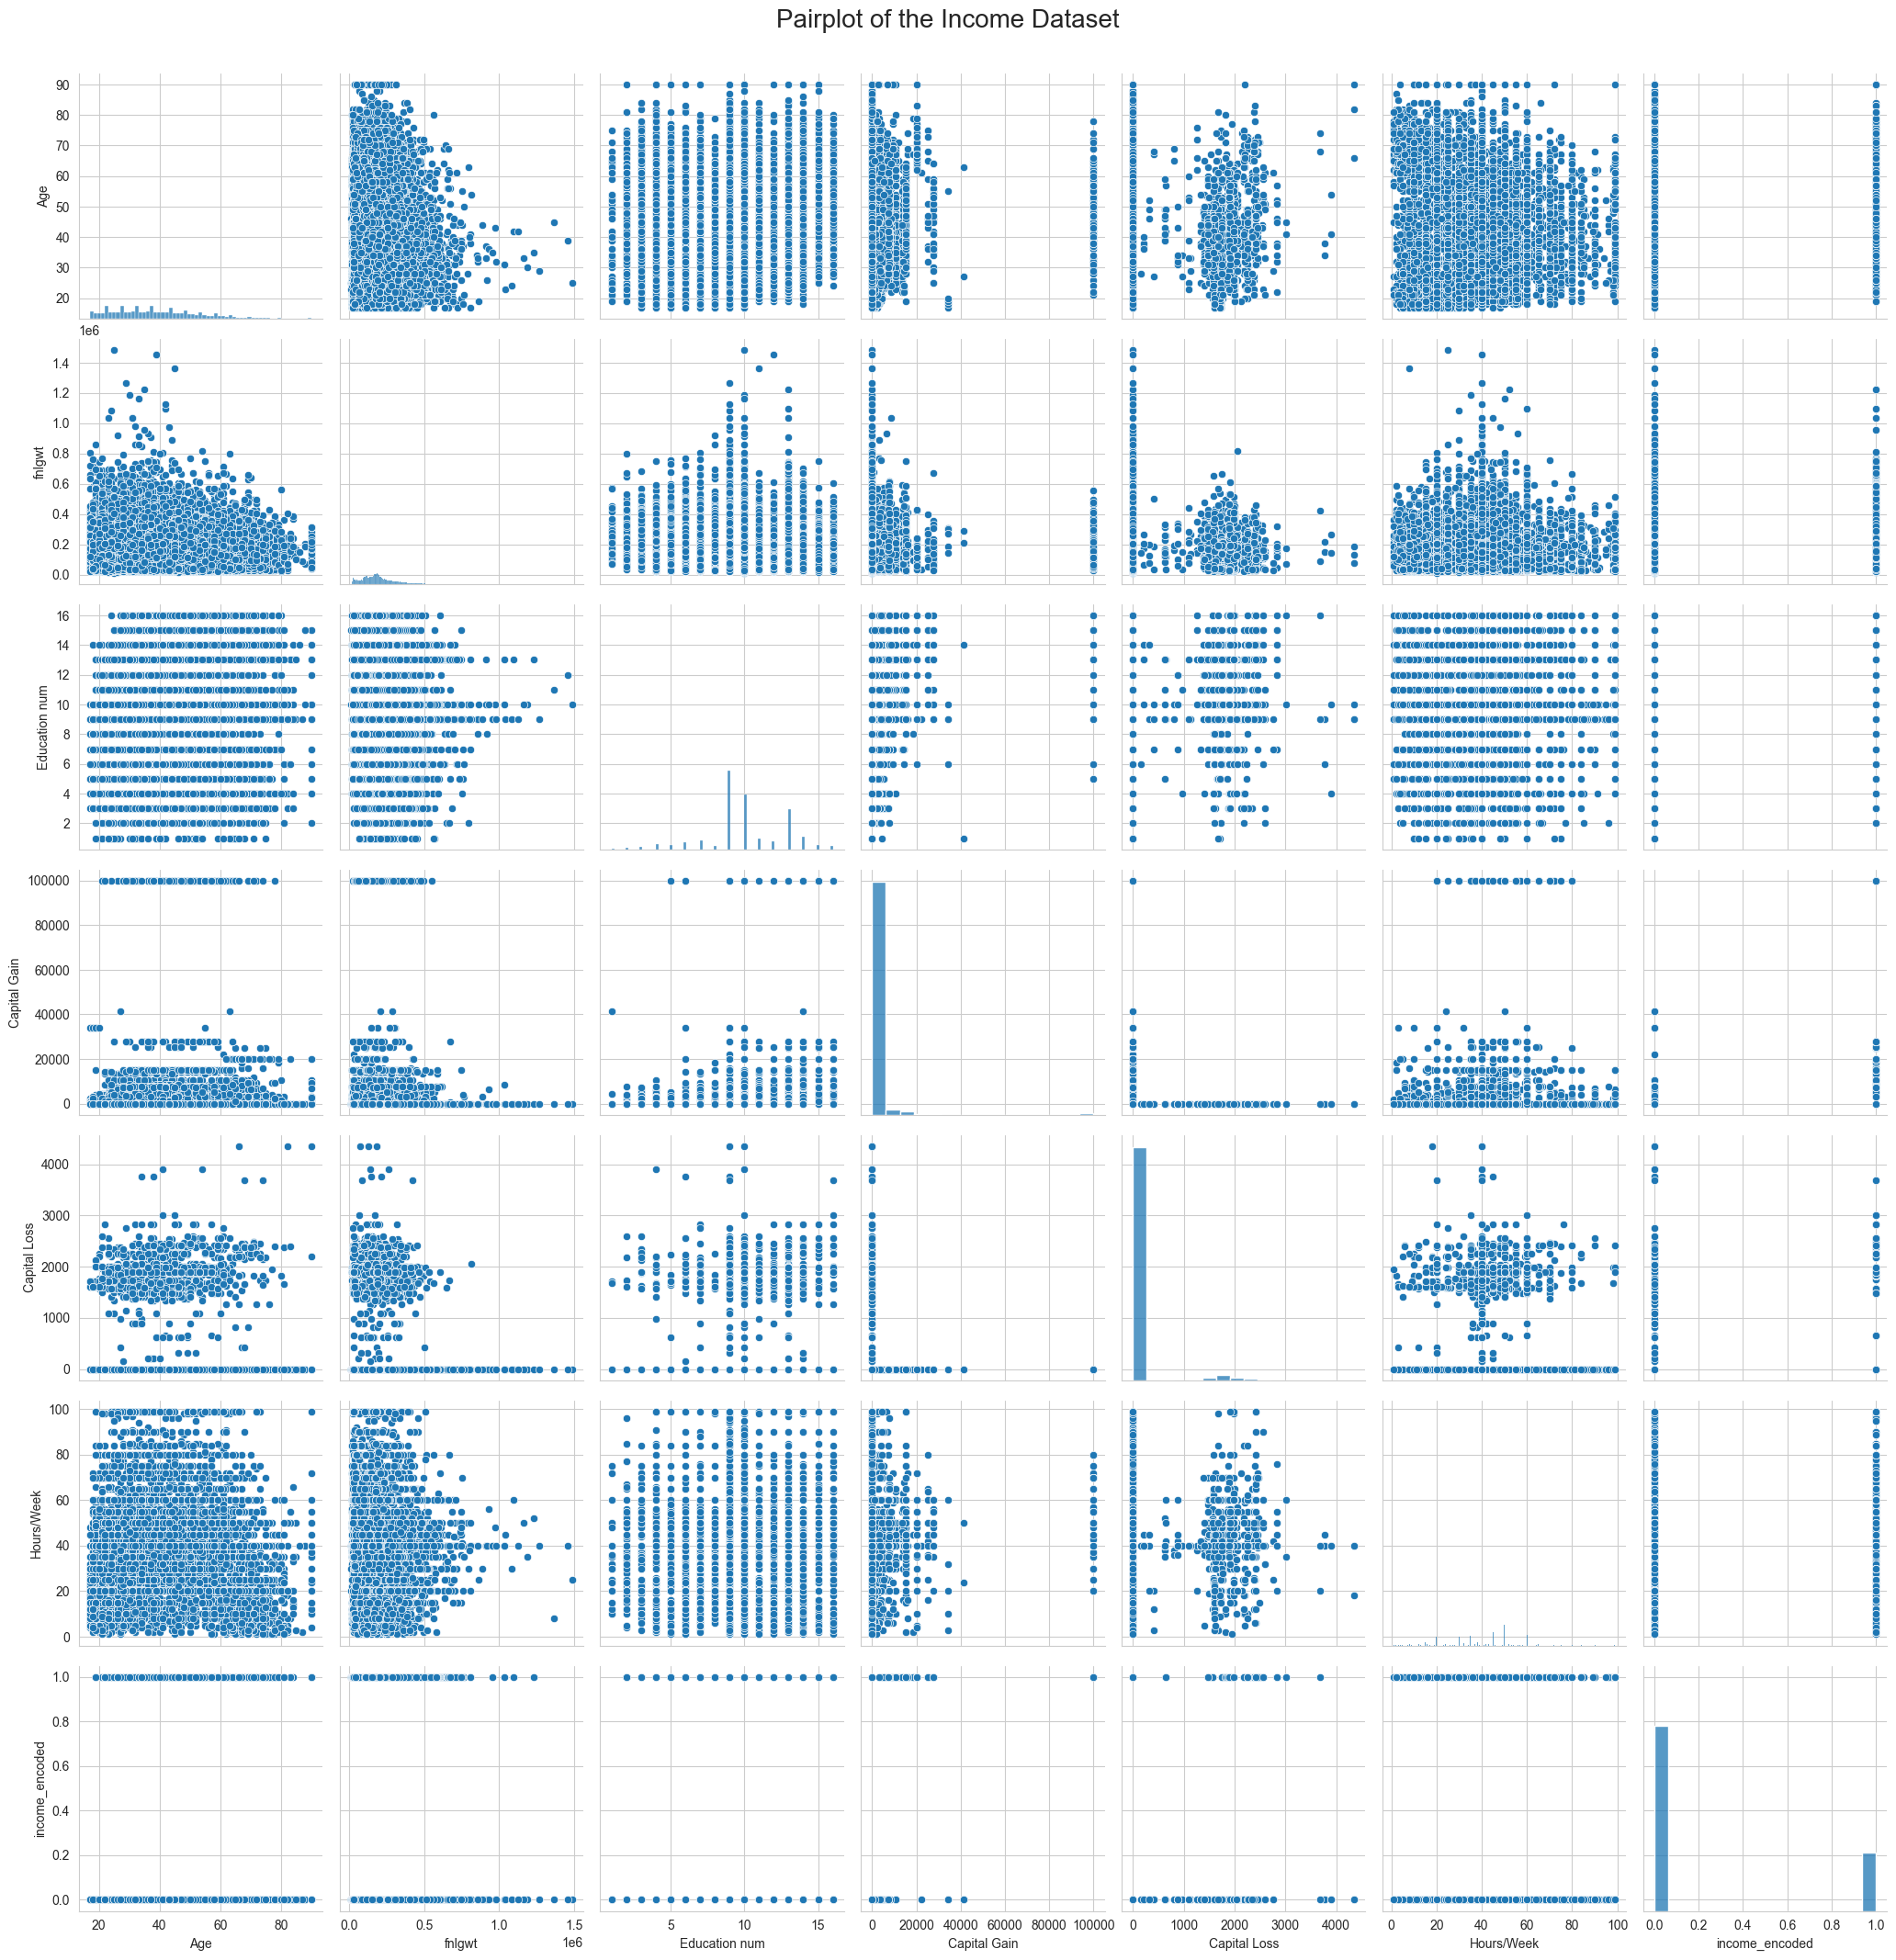

In [22]:
pair_plot = sns.pairplot(income_df, height=3)

# Enhance the plot title
pair_plot.fig.suptitle('Pairplot of the Income Dataset', y=1.02, fontsize=20)

# Display the plot
plt.show()


# TASK #5: PREPARE THE DATA TO TRAIN THE MODEL

In [23]:
income_df.columns

Index(['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours/Week', 'Native country',
       'Income', 'income_encoded'],
      dtype='object')

In [24]:
X = income_df.drop(columns=['Income', 'income_encoded'])
X

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [25]:
y = income_df['income_encoded']
y


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income_encoded, Length: 32561, dtype: int64

In [26]:
# We need numerical values to feed into  the model, so we use LabelEncoder to encode categorical variables

encode = LabelEncoder()
for i in X.columns:
    X[i] = encode.fit_transform(X[i])

In [27]:
X.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,38
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4


In [28]:
# Perform One-hot encoding
features = ['Workclass','Education','Marital Status','Occupation','Relationship','Race','Sex','Native country']

X = pd.get_dummies(X, columns = features)
X.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Workclass_0,Workclass_1,Workclass_2,Workclass_3,...,Native country_32,Native country_33,Native country_34,Native country_35,Native country_36,Native country_37,Native country_38,Native country_39,Native country_40,Native country_41
0,22,2671,12,25,0,39,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,33,2926,12,0,0,12,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,21,14086,8,0,0,39,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,36,15336,6,0,0,39,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,11,19355,12,0,0,39,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)


In [30]:
# Split the data into testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
# print input/output shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 106), (6513, 106), (26048,), (6513,))

# TASK #6: BUILD AND ASSESS THE PERFORMANCE OF A SIMPLE LOGISTIC REGRESSION MODEL

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(X_train, y_train)
print('TRAINING ACCURACY:', lr.score(X_train, y_train))

TRAINING ACCURACY: 0.8495085995085995


In [34]:
predicted = lr.predict(X_test)
print('TEST ACCURACY: ', accuracy_score(y_test, predicted))

TEST ACCURACY:  0.8446184553968985


In [35]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4936
           1       0.72      0.59      0.65      1577

    accuracy                           0.84      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



Text(0.5, 80.7222222222222, 'predicted class')

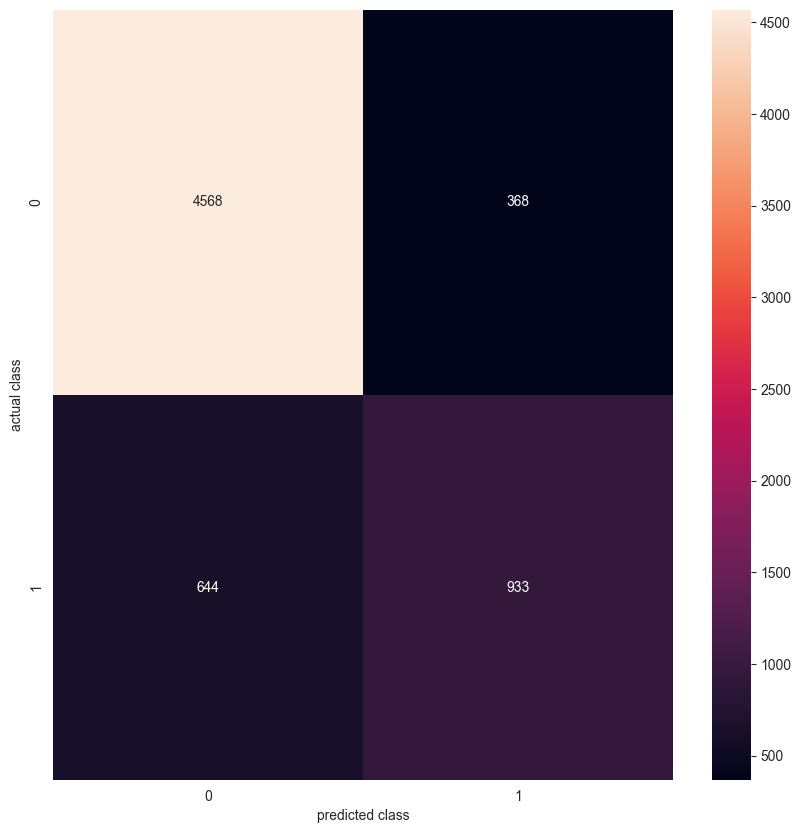

In [36]:
plt.figure(figsize = (10, 10))
cm = confusion_matrix(y_test, predicted) 
sns.heatmap(cm, annot = True,fmt = '.5g')
plt.ylabel('actual class')
plt.xlabel('predicted class')

# TASK #7: BUILD AND ASSESS THE PERFORMANCE OF XGBOOST MODEL

In [37]:
xgb = xgboost.XGBClassifier(learning_rate = 0.5)

In [38]:
xgb.fit(X_train, y_train);

In [39]:
predicted = xgb.predict(X_test)

In [40]:
predicted

array([1, 0, 0, ..., 0, 0, 0])

In [41]:
print('TEST ACCURACY: ', accuracy_score(y_test, predicted))

TEST ACCURACY:  0.8699524028865346


In [42]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4936
           1       0.76      0.67      0.71      1577

    accuracy                           0.87      6513
   macro avg       0.83      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513



Text(0.5, 80.7222222222222, 'predicted class')

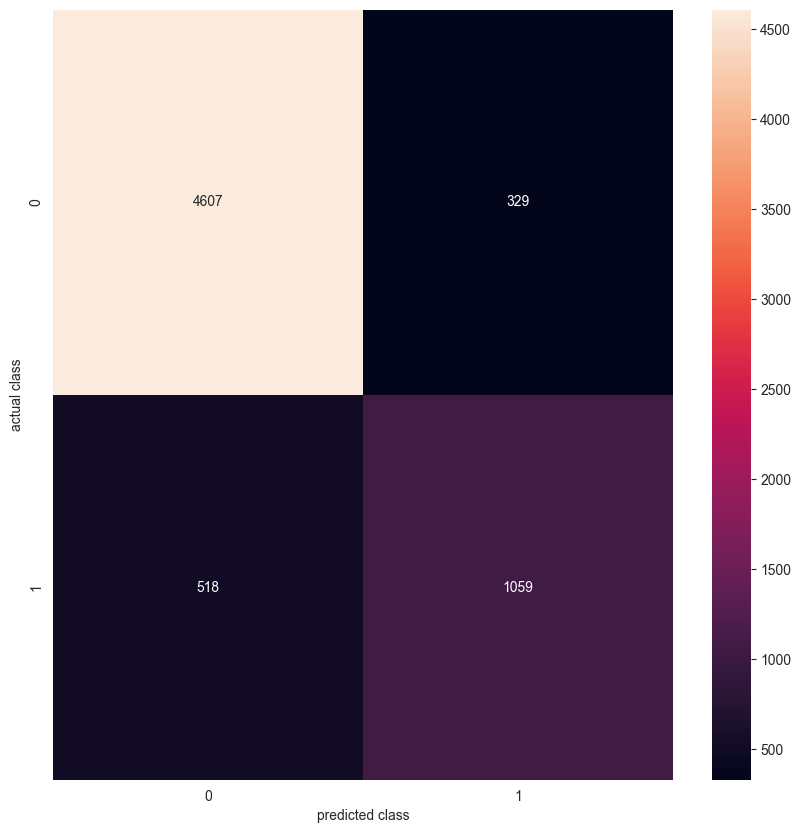

In [43]:
plt.figure(figsize = (10,10))
cm = confusion_matrix(y_test, predicted) 
sns.heatmap(cm, annot = True,fmt = '.5g')
plt.ylabel('actual class')
plt.xlabel('predicted class')